In [8]:
!pip install langchain_openai tabulate --quiet --ignore-installed

In [9]:
from utils import config
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model=config['model'], 
             base_url=config['base_url'], 
             openai_api_key=config['api_key'])

llm.invoke('hello world')

AIMessage(content=' \nHello! How can I assist you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 9, 'total_tokens': 22}, 'model_name': 'glm-4-9b-chat', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-ba8f6564-9e73-430d-9f1a-bccd8e3611a3-0', usage_metadata={'input_tokens': 9, 'output_tokens': 13, 'total_tokens': 22})

In [10]:
import pandas as pd

df = pd.read_csv(r'data/titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN


In [11]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

# from langchain.globals import set_debug, set_verbose

# set_debug(True)
# set_verbose(False)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True
)

In [13]:
agent.invoke('男性乘客有多少人幸存？')



> Entering new AgentExecutor chain...
 
Thought: To answer this question, I need to count the number of male passengers who survived. I can do this by filtering the dataframe for rows where `Sex` is 'male' and `Survived` is 1, and then counting the number of rows in the resulting dataframe.
Action: python_repl_ast
Action Input: df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]109 
I now know the final answer
Final Answer: 109男性乘客幸存

> Finished chain.


{'input': '男性乘客有多少人幸存？', 'output': '109男性乘客幸存'}



> Entering new AgentExecutor chain...
 
Thought: To display the proportion of male and female passengers in a pie chart, I need to count the number of passengers for each gender and then plot these counts in a pie chart.
Action: python_repl_ast
Action Input: df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')Axes(0.22375,0.11;0.5775x0.77) 
I now know the pie chart displaying the proportion of male and female passengers in the dataframe.

Final Answer: The pie chart shows the proportion of male and female passengers in the dataframe.

> Finished chain.


{'input': '用饼图显示男女乘客分布比例',
 'output': 'The pie chart shows the proportion of male and female passengers in the dataframe.'}

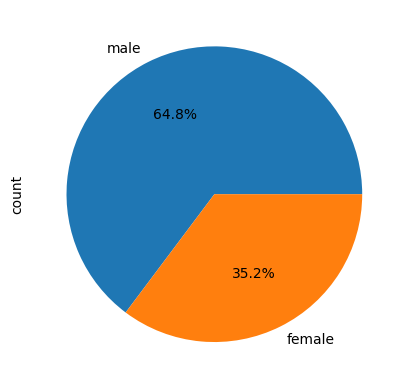

In [14]:
agent.invoke('用饼图显示男女乘客分布比例')